In [2]:
# !pip install mysql.connector

In [3]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [4]:
def create_dbs():
    """
        Create the datawarehouse and codeopfintech databases.
        If any of them already exists, Drop and create the database.
    Returns:
        success(boolean): wether the operation succeed or not.
    """
    try:
        # connect to default database
        conn = mysql.connector.connect(
            host='mysql', 
            user='root', # your user name
            password='2667' # your password
        )

        cur = conn.cursor()

        # create databases with UTF8 encoding
        cur.execute("DROP DATABASE IF EXISTS datawarehouse;")
        cur.execute("CREATE DATABASE datawarehouse CHARACTER SET utf8 COLLATE utf8_general_ci;")

        cur.execute("DROP DATABASE IF EXISTS codeopfintech;")
        cur.execute("CREATE DATABASE codeopfintech CHARACTER SET utf8 COLLATE utf8_general_ci;")

        # close connection
        conn.close()
        return True
    
    except Error as error:
        print("Failed to creating dbs:", error)
        return False

In [5]:
def get_db(db_name):
    """
    Establish connection to a database and return its connection.
    Args:
        db_name (str): The name of the database you want to connect to.
    Returns:
        cursor (mysql.connector.cursor): The MySQL cursor
        connection (mysql.connector.connection): The db connection
    """
    try:
        conn = mysql.connector.connect(
            host='mysql',  
            user='root', # your user name
            password='2667', # your password
            database=db_name  
        )
        return conn.cursor(), conn
    
    except Error as error:
        print("Failed to getting db: ", error)
        return None, None

In [6]:
create_dbs()

Failed to creating dbs: 2003: Can't connect to MySQL server on 'mysql:3306' (11001 getaddrinfo failed)


False

In [7]:
cur, conn = get_db("datawarehouse")

Failed to getting db:  2003: Can't connect to MySQL server on 'mysql:3306' (11001 getaddrinfo failed)


In [8]:
create_table = ("""
    CREATE TABLE cards (
      id varchar(34),
      user_id int,
      iban varchar(34),
      pan varchar(255),
      pin varchar(4),
      cvv varchar(255),
      track1 varchar(255),
      track2 varchar(255),
      expiring_date varchar(255),
      PRIMARY KEY (id)
    )
""")

In [9]:
cards_table_insert = ("""
    INSERT INTO cards(
        id,
        user_id,
        iban,
        pan,
        pin,
        cvv,
        track1,
        track2,
        expiring_date)
    VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s)
""")

In [11]:
cur.execute(create_table)
conn.commit()

In [ ]:
df = pd.read_csv("./data/credit_cards.csv")
df.head()

,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24


In [ ]:
for index, row in df.iterrows():
    data_tuple = tuple(row.values)
    cur.execute(cards_table_insert, data_tuple)

In [ ]:
cur.execute("SELECT * FROM cards LIMIT 15")
cur.fetchall()

[('CcU-2938',
  275,
  'TR301950312213576817638661',
  '5424465566813633',
  '3257',
  '984',
  '%B8383712448554646^WovsxejDpwiev^86041142?7',
  '%B7653863056044187=8007163336?3',
  '10/30/22'),
 ('CcU-2945',
  274,
  'DO26854763748537475216568689',
  '5142423821948828',
  '9080',
  '887',
  '%B4621311609958661^UftuyfsSeimxn^0610628241?7',
  '%B4149568437843501=5107140330?1',
  '08/24/23'),
 ('CcU-2952',
  273,
  'BG45IVQL52710525608255',
  '4556 453 55 5287',
  '4598',
  '438',
  '%B2183285104307501^CddyytcUxwfdq^5907955430?9',
  '%B6778580257827162=69068597400?7',
  '06/29/21'),
 ('CcU-2959',
  272,
  'CR7242477244335841535',
  '372461377349375',
  '3583',
  '667',
  '%B7281111956795320^XocddijBckecd^09016253?3',
  '%B4246154489281853=2805223916?8',
  '02/24/23'),
 ('CcU-2966',
  271,
  'BG72LKTQ15627628377363',
  '448566 886747 7265',
  '4900',
  '130',
  '%B4728932322756223^JhlgvsuFbmwgj^72022894943?7',
  '%B2318571115599881=8908215784?5',
  '10/29/24'),
 ('CcU-2973',
  270,
  'PT8

In [ ]:
conn.commit()

Creamos tabla productos

In [ ]:
create_table = ("""
    CREATE TABLE products (
      id varchar(34),
      product_name varchar(34),
      price varchar(10),
      colour varchar(10),
      weight float,
      warehouse_id varchar(8),
      PRIMARY KEY (id)
    )
""")

In [ ]:
cur.execute(create_table)
conn.commit()

In [ ]:
df = pd.read_csv("./data/products.csv")
df.head()

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,$9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,$171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,$71.89,#111111,3.0,WH-1
4,5,skywalker ewok,$171.22,#dbdbdb,3.2,WH-0


In [ ]:
cur.executemany("""
    INSERT INTO products(
        id,
        product_name,
        price,
        colour,
        weight,
        warehouse_id)
    VALUES (%s, %s, %s, %s, %s, %s)
""", df.values.tolist()
                  )

In [ ]:
conn.commit()

In [ ]:
cur.execute("SELECT * FROM products LIMIT 5")
cur.fetchall()

[('1', 'Direwolf Stannis', '$161.11', '#7c7c7c', 1.0, 'WH-4'),
 ('10', 'Karstark Dorne', '$119.52', '#f4f4f4', 2.4, 'WH--5'),
 ('100', 'south duel', '$40.43', '#6d6d6d', 3.0, 'WH--95'),
 ('11', 'Karstark Dorne', '$49.70', '#141414', 2.7, 'WH--6'),
 ('12', 'duel Direwolf', '$181.60', '#a8a8a8', 2.1, 'WH--7')]

Creamos tabla companies

In [ ]:
create_table = ("""
    CREATE TABLE companies (
      company_id varchar(34),
      company_name varchar(255),
      phone varchar(34),
      email varchar(60),
      country varchar(20),
      website varchar(60),
      PRIMARY KEY (company_id)
    )
""")

In [ ]:
cur.execute(create_table)
conn.commit()

In [ ]:
df=pd.read_json('./data/companies.json')
df.head()

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings


In [ ]:
cur.executemany("""
    INSERT INTO companies(
        company_id,
        company_name,
        phone,
        email,
        country,
        website)
    VALUES (%s, %s, %s, %s, %s, %s)
""", df.values.tolist()
                  )

In [ ]:
cur.execute("SELECT * FROM companies LIMIT 5")
cur.fetchall()

[('b-2222',
  'Ac Fermentum Incorporated',
  '06 85 56 52 33',
  'donec.porttitor.tellus@yahoo.net',
  'Germany',
  'https://instagram.com/site'),
 ('b-2226',
  'Magna A Neque Industries',
  '04 14 44 64 62',
  'risus.donec.nibh@icloud.org',
  'Australia',
  'https://whatsapp.com/group/9'),
 ('b-2230',
  'Fusce Corp.',
  '08 14 97 58 85',
  'risus@protonmail.edu',
  'United States',
  'https://pinterest.com/sub/cars'),
 ('b-2234',
  'Convallis In Incorporated',
  '06 66 57 29 50',
  'mauris.ut@aol.couk',
  'Germany',
  'https://cnn.com/user/110'),
 ('b-2238',
  'Ante Iaculis Nec Foundation',
  '08 23 04 99 53',
  'sed.dictum.proin@outlook.ca',
  'New Zealand',
  'https://netflix.com/settings')]

In [ ]:
conn.commit()

Creamos tabla transacciones

In [ ]:
create_table = ("""
    CREATE TABLE transactions (
      id varchar(255),
      card_id varchar(34),
      business_id varchar(34),
      lat_long varchar(255),
      timestamp varchar(50),
      amount varchar(10),
      declined boolean,
      product_ids varchar(50),
      PRIMARY KEY (id)
    )
""")

In [ ]:
cur.execute(create_table)
conn.commit()

In [ ]:
df_1 =pd.read_json('./data/transactions_1.json')
df_2 =pd.read_json('./data/transactions_2.json')
df = pd.concat([df_1, df_2], axis=0)
df.head()

,id,card_id,business_id,lat_long,timestamp,amount,declined,product_ids
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,"83.7839152128, -178.860353536",2021-07-07 17:43:16,$293.57,False,59
1,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,b-2226,"58.9367181312, -76.8171099136",2022-02-04 15:52:56,$312.50,False,"71, 41"
2,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,CcU-2952,b-2230,"43.3584055296, -17.6579677184",2022-01-30 15:16:36,$239.87,False,"97, 41, 3"
3,AB069F53-965E-A2A8-CE06-CA8C4FD92501,CcU-2959,b-2234,"1.6481916928, -158.0065729536",2021-04-15 13:37:18,$60.99,False,"11, 13, 61, 29"
4,2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5,CcU-2966,b-2238,"-43.4811227136, 16.6025207808",2021-10-18 06:12:03,$33.81,False,"47, 37, 11, 1"


In [ ]:
df.columns

Index(['id', 'card_id', 'business_id', 'lat_long', 'timestamp', 'amount',
       'declined', 'product_ids'],
      dtype='object')

In [ ]:
df.isnull().sum()

id             0
card_id        0
business_id    0
lat_long       0
timestamp      0
amount         0
declined       0
product_ids    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 86
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   lat_long     587 non-null    object        
 4   timestamp    587 non-null    datetime64[ns]
 5   amount       587 non-null    object        
 6   declined     587 non-null    bool          
 7   product_ids  587 non-null    object        
dtypes: bool(1), datetime64[ns](1), object(6)
memory usage: 37.3+ KB


In [ ]:
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
df.isnull().sum()

id             0
card_id        0
business_id    0
lat_long       0
timestamp      0
amount         0
declined       0
product_ids    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 86
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           587 non-null    object
 1   card_id      587 non-null    object
 2   business_id  587 non-null    object
 3   lat_long     587 non-null    object
 4   timestamp    587 non-null    object
 5   amount       587 non-null    object
 6   declined     587 non-null    bool  
 7   product_ids  587 non-null    object
dtypes: bool(1), object(7)
memory usage: 37.3+ KB


In [ ]:
cur.executemany("""
    INSERT INTO transactions(
        id,
        card_id,
        business_id,
        lat_long,
        timestamp,
        amount,
        declined,
        product_ids
                )
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
""", df.values.tolist()
                  )

In [ ]:
cur.execute("SELECT * FROM transactions LIMIT 5")
cur.fetchall()

[('02C6201E-D90A-1859-B4EE-88D2986D3B02',
  'CcU-2938',
  'b-2362',
  '81.9184589824, -12.5275561984',
  '2021-08-28 23:42:24',
  '$466.92',
  0,
  '71, 1, 19'),
 ('0466A42E-47CF-8D24-FD01-C0B689713128',
  'CcU-4219',
  'b-2302',
  '-43.9694885888, -117.5251835904',
  '2021-07-26 07:29:18',
  '$49.53',
  0,
  '47, 97, 43'),
 ('063FBA79-99EC-66FB-29F7-25726D1764A5',
  'CcU-2987',
  'b-2250',
  '-81.222680576, -129.049879552',
  '2022-01-06 21:25:27',
  '$92.61',
  0,
  '47, 67, 31, 5'),
 ('0668296C-CDB9-A883-76BC-2E4C44F8C8AE',
  'CcU-3743',
  'b-2618',
  '-34.3593055232, -100.555928064',
  '2022-01-26 02:07:14',
  '$394.18',
  0,
  '89, 83, 79'),
 ('06CD9AA5-9B42-D684-DDDD-A5E394FEBA99',
  'CcU-2959',
  'b-2346',
  '33.7381445632, 158.298210304',
  '2021-10-26 23:00:01',
  '$279.93',
  0,
  '43, 31')]

In [ ]:
conn.commit()

1. Solucion 1 con tabla puente pero dividiendo transactions en varias columnas

Creamos tabla transacciones productos

In [ ]:
create_table = ("""
    CREATE TABLE transactions_products (
      transaction_id varchar(255),
      product_id varchar(34),
      PRIMARY KEY (transaction_id, product_id),
      FOREIGN KEY (transaction_id) REFERENCES transactions(id),
      FOREIGN KEY (product_id) REFERENCES products(id)
    )
""")

In [ ]:
cur.execute(create_table)
conn.commit()

In [ ]:
import numpy as np

In [ ]:
df.head()

,id,card_id,business_id,lat_long,timestamp,amount,declined,product_ids
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,"83.7839152128, -178.860353536",2021-07-07 17:43:16,$293.57,False,59
1,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,b-2226,"58.9367181312, -76.8171099136",2022-02-04 15:52:56,$312.50,False,"71, 41"
2,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,CcU-2952,b-2230,"43.3584055296, -17.6579677184",2022-01-30 15:16:36,$239.87,False,"97, 41, 3"
3,AB069F53-965E-A2A8-CE06-CA8C4FD92501,CcU-2959,b-2234,"1.6481916928, -158.0065729536",2021-04-15 13:37:18,$60.99,False,"11, 13, 61, 29"
4,2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5,CcU-2966,b-2238,"-43.4811227136, 16.6025207808",2021-10-18 06:12:03,$33.81,False,"47, 37, 11, 1"


In [ ]:
df[['p1', 'p2', 'p3', 'p4']]=df['product_ids'].str.split(',', expand=True)
df['p1']=df['p1'].fillna(df['product_ids'])
# SQL no entiende None sino NaN
df=df.fillna(np.nan)
df.head()

,id,card_id,business_id,lat_long,timestamp,amount,declined,product_ids,p1,p2,p3,p4
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,"83.7839152128, -178.860353536",2021-07-07 17:43:16,$293.57,False,59,59,NaN,NaN,NaN
1,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,b-2226,"58.9367181312, -76.8171099136",2022-02-04 15:52:56,$312.50,False,"71, 41",71,41,NaN,NaN
2,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,CcU-2952,b-2230,"43.3584055296, -17.6579677184",2022-01-30 15:16:36,$239.87,False,"97, 41, 3",97,41,3,NaN
3,AB069F53-965E-A2A8-CE06-CA8C4FD92501,CcU-2959,b-2234,"1.6481916928, -158.0065729536",2021-04-15 13:37:18,$60.99,False,"11, 13, 61, 29",11,13,61,29
4,2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5,CcU-2966,b-2238,"-43.4811227136, 16.6025207808",2021-10-18 06:12:03,$33.81,False,"47, 37, 11, 1",47,37,11,1


Haremos df peque;os con el primer producto de cada transaccion, luego con los segundos, terceros y cuartos

In [ ]:
p1=df[['id','p1']]
p1.head()

,id,p1
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,59
1,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,71
2,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,97
3,AB069F53-965E-A2A8-CE06-CA8C4FD92501,11
4,2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5,47


In [ ]:
insert_trans_prod = """
    INSERT INTO transactions_products(
        transaction_id,
        product_id)
    VALUES (%s, %s)
"""

In [ ]:
cur.executemany(insert_trans_prod, p1.values.tolist())

In [ ]:
conn.commit()

In [ ]:
#elimino nan y espacio inicial
p2=df[['id','p2']]
p2=p2.dropna()
p2['p2']=p2['p2'].str.strip()

In [ ]:
cur.executemany(insert_trans_prod, p2.values.tolist())

repito para 3 y 4

In [ ]:
p3=df[['id','p3']]
p3=p3.dropna()
p3['p3']=p3['p3'].str.strip()

In [ ]:
cur.executemany(insert_trans_prod, p3.values.tolist())

In [ ]:
p4=df[['id','p4']]
p4=p4.dropna()
p4['p4']=p4['p4'].str.strip()

In [ ]:
cur.executemany(insert_trans_prod, p4.values.tolist())
conn.commit()

In [ ]:
cur.execute("SELECT * FROM transactions_products")
cur.fetchall()

[('02C6201E-D90A-1859-B4EE-88D2986D3B02', '1'),
 ('122DC333-E19F-D629-DCD8-9C54CF1EBB9A', '1'),
 ('1753A288-9FC1-52E6-5C39-A1FFB97B0D3A', '1'),
 ('1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA', '1'),
 ('1EA2B262-D507-AD14-4374-4D532967113F', '1'),
 ('23CF8ED3-402C-7C54-59CD-DB505C5CCCCE', '1'),
 ('2A5A3001-104F-1D1F-7852-5BA801869B6F', '1'),
 ('2F3B6AB6-147D-EB0B-FE8D-9A4E2EA9DBD5', '1'),
 ('2F499B4D-4DC7-B337-010D-8B7471812A80', '1'),
 ('2F74E99B-9337-7F74-5208-5DEC81A174FD', '1'),
 ('331A8A52-52D4-D323-0388-1A97C982E441', '1'),
 ('35DE2442-5AEB-9C73-E8DE-BC31DEA8C4DE', '1'),
 ('3DED9D58-D22A-2B11-C662-183011AE51F4', '1'),
 ('3E495EC1-E1C5-26F1-0E3E-2D13EAA2593A', '1'),
 ('41A2942C-D6E1-B164-2A45-D7ED17237A3A', '1'),
 ('467CC274-71A7-51F4-B58A-A77AADD25833', '1'),
 ('4E562A2B-99E9-8C82-2340-B6623BC9FE2F', '1'),
 ('5458A436-88C5-7CBD-CEB6-8A4545B12CCA', '1'),
 ('615195B8-9983-A350-3DC7-A16B5135D68C', '1'),
 ('62A399E3-0FDD-2E65-5A95-21D8C59C33DC', '1'),
 ('634E63C6-C2D6-EC48-4CCF-6B4A60AAEEB7'

In [ ]:
cur.execute("SELECT * FROM transactions_products WHERE transaction_id='AB069F53-965E-A2A8-CE06-CA8C4FD92501'")
cur.fetchall()

[('AB069F53-965E-A2A8-CE06-CA8C4FD92501', '11'),
 ('AB069F53-965E-A2A8-CE06-CA8C4FD92501', '13'),
 ('AB069F53-965E-A2A8-CE06-CA8C4FD92501', '29'),
 ('AB069F53-965E-A2A8-CE06-CA8C4FD92501', '61')]

2.  Solución 2 con una bridge table con la info de transactions tal cual y product 

In [ ]:
# cur.execute("DROP TABLE transactions_products")
# conn.commit

In [ ]:
df_1 =pd.read_json('./data/transactions_1.json')
df_2 =pd.read_json('./data/transactions_2.json')
df = pd.concat([df_1, df_2], axis=0)

In [ ]:
# Create a bridge table for the many-to-many relationship between transactions and products
cur.execute("""
    CREATE TABLE transactions_products (
        transaction_id VARCHAR(36),
        product_id INT,
        PRIMARY KEY (transaction_id, product_id),
        FOREIGN KEY (transaction_id) REFERENCES transactions(id),
        FOREIGN KEY (product_id) REFERENCES products(id)
    )
""")

In [ ]:
import json

In [ ]:
df.product_ids = df.product_ids.astype(str)

In [ ]:
all_product_inserts = []

for index, transaction in df.iterrows():
    product_ids = transaction['product_ids'].split(', ')
    for product_id in product_ids:
        all_product_inserts.append((transaction['id'], product_id))

In [ ]:
cur.executemany("""
    INSERT INTO transactions_products (transaction_id, product_id)
    VALUES (%s, %s)
""", all_product_inserts)

conn.commit()

In [ ]:
cur.execute("SELECT * FROM transactions_products")
cur.fetchall()

[('02C6201E-D90A-1859-B4EE-88D2986D3B02', 1),
 ('02C6201E-D90A-1859-B4EE-88D2986D3B02', 19),
 ('02C6201E-D90A-1859-B4EE-88D2986D3B02', 71),
 ('0466A42E-47CF-8D24-FD01-C0B689713128', 43),
 ('0466A42E-47CF-8D24-FD01-C0B689713128', 47),
 ('0466A42E-47CF-8D24-FD01-C0B689713128', 97),
 ('063FBA79-99EC-66FB-29F7-25726D1764A5', 5),
 ('063FBA79-99EC-66FB-29F7-25726D1764A5', 31),
 ('063FBA79-99EC-66FB-29F7-25726D1764A5', 47),
 ('063FBA79-99EC-66FB-29F7-25726D1764A5', 67),
 ('0668296C-CDB9-A883-76BC-2E4C44F8C8AE', 79),
 ('0668296C-CDB9-A883-76BC-2E4C44F8C8AE', 83),
 ('0668296C-CDB9-A883-76BC-2E4C44F8C8AE', 89),
 ('06CD9AA5-9B42-D684-DDDD-A5E394FEBA99', 31),
 ('06CD9AA5-9B42-D684-DDDD-A5E394FEBA99', 43),
 ('07A46D48-31A3-7E87-65B9-0DA902AD109F', 23),
 ('07A46D48-31A3-7E87-65B9-0DA902AD109F', 47),
 ('09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2', 7),
 ('09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2', 67),
 ('0A476ED9-0C13-1962-F87B-D3563924B539', 11),
 ('0A476ED9-0C13-1962-F87B-D3563924B539', 29),
 ('0A476ED9-0C13

Creamos tabla users

In [ ]:
create_table = ("""
    CREATE TABLE users (
      id int,
      name varchar(30),
      surname varchar(30),
      phone varchar(50),
      email varchar(50),
      birth_date varchar(50),
      country varchar(50),
      city varchar(50),
      postal_code varchar(15),
      address varchar(150),
      PRIMARY KEY (id)
    )
""")

In [ ]:
cur.execute(create_table)
conn.commit()

In [ ]:
df_3 =pd.read_json('./data/users_ca.json')
df_4 =pd.read_json('./data/users_uk.json')
df_5 =pd.read_json('./data/users_usa.json')
df = pd.concat([df_3, df_4, df_5], axis=0)

In [ ]:
df.columns

Index(['id', 'name', 'surname', 'phone', 'email', 'birth_date', 'country',
       'city', 'postal_code', 'address'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 149
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    int64 
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.6+ KB


In [ ]:
cur.executemany("""
    INSERT INTO users (
      id,
      name,
      surname,
      phone,
      email,
      birth_date,
      country,
      city,
      postal_code,
      address
        )
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
""", df.values.tolist()
)

In [ ]:
cur.execute("SELECT * FROM users")
cur.fetchall()

[(1,
  'Zeus',
  'Gamble',
  '1-282-581-0551',
  'interdum.enim@protonmail.edu',
  'Nov 17, 1985',
  'United States',
  'Lowell',
  '73544',
  '348-7818 Sagittis St.'),
 (2,
  'Garrett',
  'Mcconnell',
  '(718) 257-2412',
  'integer.vitae.nibh@protonmail.org',
  'Aug 23, 1992',
  'United States',
  'Des Moines',
  '59464',
  '903 Sit Ave'),
 (3,
  'Ciaran',
  'Harrison',
  '(522) 598-1365',
  'interdum.feugiat@aol.org',
  'Apr 29, 1998',
  'United States',
  'Columbus',
  '56518',
  '736-2063 Tellus St.'),
 (4,
  'Howard',
  'Stafford',
  '1-411-740-3269',
  'ornare.egestas@icloud.edu',
  'Feb 18, 1989',
  'United States',
  'Kailua',
  '77417',
  'Ap #545-2244 Erat. Rd.'),
 (5,
  'Hayfa',
  'Pierce',
  '1-554-541-2077',
  'et.malesuada.fames@hotmail.org',
  'Sep 26, 1998',
  'United States',
  'Sandy',
  '31564',
  '341-2821 Ultrices Av.'),
 (6,
  'Joel',
  'Tyson',
  '(718) 288-8020',
  'gravida.nunc.sed@yahoo.ca',
  'Oct 15, 1989',
  'United States',
  'Nashville',
  '96838',
  '888

In [ ]:
# otra forma de hacer tablas
from sqlalchemy import create_engine

# Información de la base de datos que ya tenemos
username = 'root'
password = '2667'
host = 'mysql'
database = 'datawarehouse' 

database_url = f"mysql+mysqlconnector://{username}:{password}@{host}/{database}"
engine = create_engine(database_url)


In [ ]:
df.to_sql('users', con=engine, if_exists='replace', index=False)

-1

In [ ]:
cur.execute("SELECT * FROM users")
cur.fetchall()

[(201,
  'Iola',
  'Powers',
  '018-139-4717',
  'ante.blandit@outlook.edu',
  'Mar 20, 2000',
  'Canada',
  'Rigolet',
  'V6T 6M7',
  '154-5415 Auctor St.'),
 (202,
  'Maxwell',
  'Holden',
  '045-402-7693',
  'donec@hotmail.edu',
  'Dec 2, 1986',
  'Canada',
  'Murdochville',
  'S7E 6E0',
  'Ap #880-6372 Ultrices. St.'),
 (203,
  'Jarrod',
  'Fields',
  '010-741-8105',
  'sit.amet@google.couk',
  'Jan 6, 1982',
  'Canada',
  'Baddeck',
  'K3X 6Z5',
  '441-8969 Rhoncus Road'),
 (204,
  'Emerson',
  'Sharp',
  '068-138-9383',
  'ante.iaculis@outlook.ca',
  'Oct 15, 1994',
  'Canada',
  'Maple Creek',
  'Y2C 9E6',
  '517-6759 Ut, Av.'),
 (205,
  'Sonya',
  'Mckee',
  '041-151-9737',
  'magna.phasellus.dolor@google.ca',
  'May 7, 1983',
  'Canada',
  'Dieppe',
  'E7S 4P8',
  'Ap #916-8051 A St.'),
 (206,
  'Harper',
  'Hart',
  '030-656-1670',
  'fringilla.donec@outlook.net',
  'Nov 17, 2000',
  'Canada',
  'Québec City',
  'B4K 0J6',
  '8588 Massa. Ave'),
 (207,
  'Yvonne',
  'Hatfield'

In [ ]:
cur.execute("SHOW TABLES")
cur.fetchall()

[('cards',),
 ('companies',),
 ('products',),
 ('transactions',),
 ('transactions_products',),
 ('users',)]

## Relaciones

In [ ]:
cur.execute("""
    ALTER TABLE transactions
    ADD CONSTRAINT fk_cards_transactions
    FOREIGN KEY (card_id)
    REFERENCES cards(id)
    """)
conn.commit()

In [ ]:
cur.execute("""
    ALTER TABLE transactions
    ADD CONSTRAINT fk_companies_transactions
    FOREIGN KEY (business_id)
    REFERENCES companies(company_id)
    """)
conn.commit()

In [ ]:
cur.execute("""
    ALTER TABLE transactions
    ADD COLUMN user_id INT 
    """)
conn.commit()

In [ ]:
cur.execute("""
    UPDATE transactions
    JOIN cards ON transactions.card_id = cards.id
    SET transactions.user_id = cards.user_id
    """)
conn.commit()

In [ ]:
cur.execute("""    
    ALTER TABLE transactions
    ADD CONSTRAINT fk_users_transactions
    FOREIGN KEY (user_id)
    REFERENCES users(id)
    """)
conn.commit()

Diagrama final:

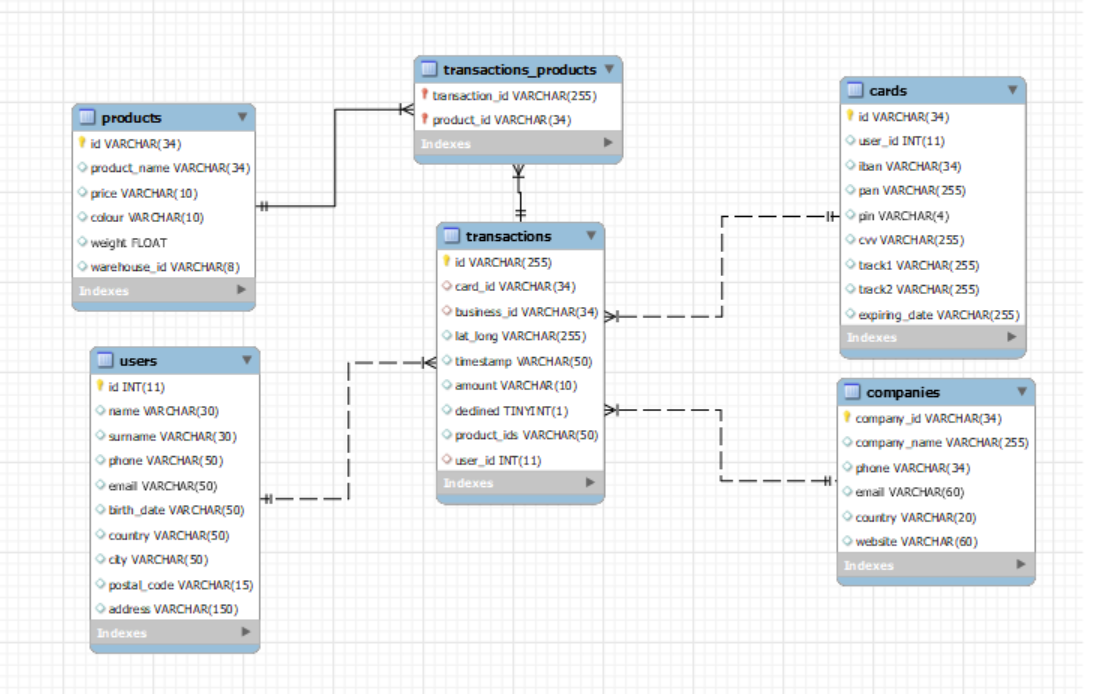

In [ ]:
conn.close()